# <strong> Predicting Video Game Sales</strong> using various ML models

## <strong>Intro to Problem and Data</strong>:
The video game industry has emerged as a dominant force in global entertainment, generating billions of $ in revenue yearly and captivating audiences across all age groups, including myself. For my final project, I aim to develop a predictive model capable of accurately forecasting the success of video games in terms of global sales. By analyzing historical sales data, this model seeks to identify trends and patterns that contribute to a video game's commercial performance.

**The critical metric**: Global sales figures, measured in millions of units, are the main measure for success. This model could prove invaluable for game developers, publishers, and marketers, enabling them to identify key factors that drive sales.


## <strong>Dataset Description</strong>:
I sourced this dataset from [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales). It is a 1.4 MB csv file which holds data for 16,598 video games. The list contains video games that had sales greater than 100k copies each. The data has no missing information in any of the cells so preprocessing for null/NaN values is not required. The user said it was generated by web-scraping of [vgchartz.com](https://vgchartz.com) using BS4 Python library.

<br/>

<strong>Data fields in the csv include:</strong>

* Rank - Ranking of overall sales

* Name - The title of the game

* Platform - Platform of the games release (i.e. PC, Xbox, etc)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

<br/>

I think that challenges will certainly arise in constructing an accurate predictive model due to the diverse factors influencing video game sales, such as shifting consumer preferences, platform popularity, and varying market dynamics across regions. One issue I have to account for is that certain videogames are extreme datapoints in relation to the distribution and perform way better than others due to the actual content and popularity of the game, which is an external factor not accounted for. Another issue is that games with the same title may be released on multiple platforms and count as separate entries in the dataset, potentially introducing duplicate entries or complicating data aggregation. (Ex: Grand Theft Auto V released on Xbox 360, Xbox One, Playstation 3, Playstation 4, and PC).

In [145]:
#imported necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [146]:
from google.colab import files

# Upload a file
uploaded = files.upload()


#uploaded video games sales csv to Google Drive
import pandas as pd
filepath = "vgsales.csv"
df = pd.read_csv(filepath)
df.head()

Saving vgsales.csv to vgsales (1).csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## <strong>Dataset Preprocessing</strong>
At this point, I've come to a dilemma. Should I aggregate games which are released on multiple platforms (such as Grand Theft Auto V) into one data entry?

That would put the total sales of the game together into one. I should note that by the year 2020, GTA V had already sold over 100 million copies across ALL platforms, beating the rank 1 Wii Sports (82.4 million only on Wii platform) by a significant margin. I feel as though this would accurately show the most accurate video games of all time. This also reduces redundancy because in almost all accounts, the content of a video game title are the same across all platforms.

However, I see the obvious downsides. Merging the platforms together into one game title entry will throw off the platform field of my data. Different platforms cater to different audiences, and those platform-specific insights will be lost. I feel like the platform a game is on is extremely important to factor into our predictive model. Furthermore, other data differs by platform even with the same game title. GTA V was released in 2013 on Xbox 360 and PS3, but was released on PC in 2015, this year data cannot be accounted for properly in a model.

I decided to keep the original dataset in order to preserve the relationship between specific platforms and their respective video game sales.



In [147]:
# For proper scaling, I will also convert the Global_Sales (in millions) into normal values 1.2 million -> 1,200,000
df['Global_Sales'] = df['Global_Sales'] * 1000000

In [148]:
df = df.dropna(subset=['Year', 'Publisher'])
#drop rows with missing values, they make up a very small portion of dataset so it's ok to drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [149]:
min= int(df['Year'].min())
max = int(df['Year'].max())
print(f"The years of games range from {min} to {max}")

unique_platforms = df['Platform'].nunique()
unique_publishers = df['Publisher'].nunique()
unique_genres = df['Genre'].nunique()
unique_names = df['Name'].nunique()

print(f"Number of unique platforms: {unique_platforms}")
print(f"Number of unique publishers: {unique_publishers}")
print(f"Number of unique genres: {unique_genres}")
print(f"Number of unique names: {unique_names}")





The years of games range from 1980 to 2020
Number of unique platforms: 31
Number of unique publishers: 576
Number of unique genres: 12
Number of unique names: 11325


## <strong>Exploratory Data Analysis</strong>

In [150]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82740000.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40240000.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35820000.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33000000.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31370000.0


In [151]:
#Total global game sales is the metric we are using here

mean = df['Global_Sales'].mean()
print(f"The mean global sales is {mean} sales")

median = df['Global_Sales'].median()
print(f"The median global sales is {median} sales")

std = df['Global_Sales'].std()
print(f"The standard deviation of global sales is {std} sales")

min = df['Global_Sales'].min()
print(f"The minimum global sales is {min} sales")

max = df['Global_Sales'].max()
print(f"The maximum global sales is {max} sales")

The mean global sales is 540910.3185808115 sales
The median global sales is 170000.0 sales
The standard deviation of global sales is 1567344.5067836638 sales
The minimum global sales is 10000.0 sales
The maximum global sales is 82740000.0 sales


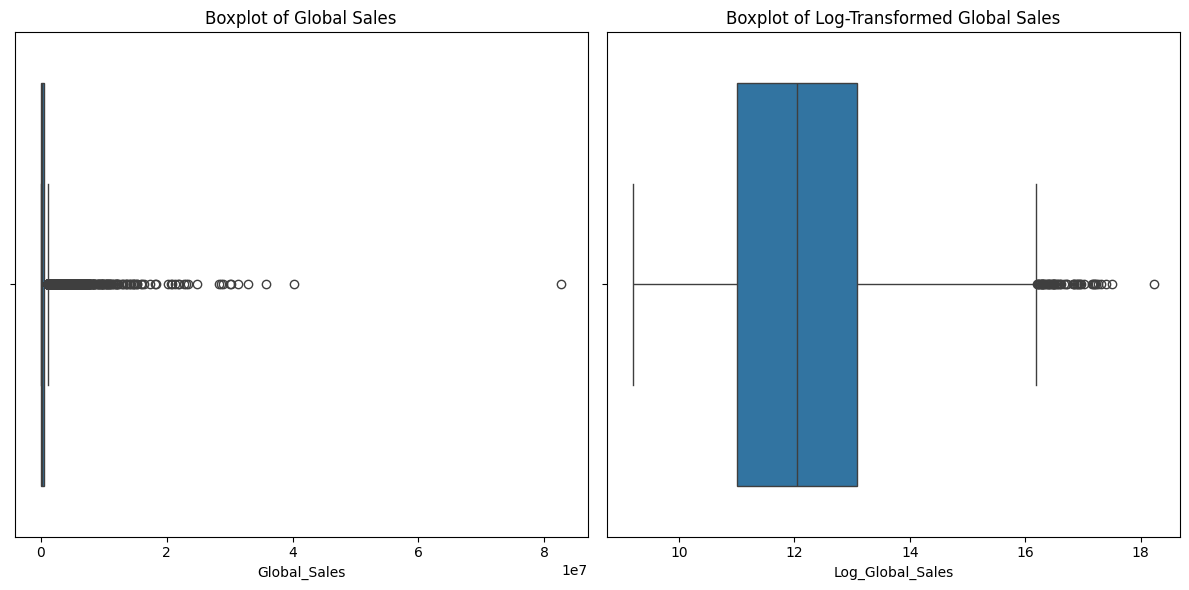

In [152]:
#Creating a copy of the data for visualization
df_copy = df.copy()

# Adding a log-transformed version
df_copy['Log_Global_Sales'] = np.log(df['Global_Sales'])

# SIDE BY SIDE BOX PLOTS
plt.figure(figsize=(12, 6))

# OG Global Sales boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy, x='Global_Sales')
plt.title('Boxplot of Global Sales')

# Log-transformed Global Sales boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_copy, x='Log_Global_Sales')
plt.title('Boxplot of Log-Transformed Global Sales')

plt.tight_layout()
plt.show()

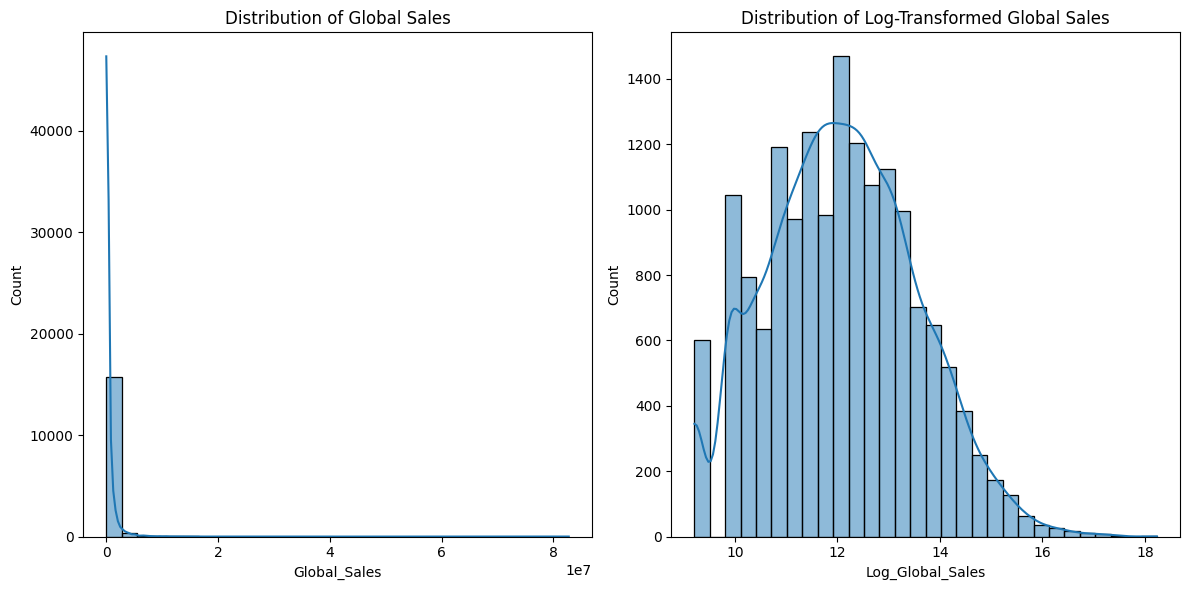

In [153]:
plt.figure(figsize=(12, 6))

# OG version histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_copy, x='Global_Sales', bins=30, kde=True)
plt.title('Distribution of Global Sales')

# Log-transformed histogram of Global Sales
plt.subplot(1, 2, 2)
sns.histplot(data=df_copy, x='Log_Global_Sales', bins=30, kde=True)
plt.title('Distribution of Log-Transformed Global Sales')

plt.tight_layout()
plt.show()

Based on the distribution of dataset video game sales is not normal and heavily-skewed to the right, with the vast majority of video games selling less than 1 million copies. This is evident with the median value of 170,000 copies sold.

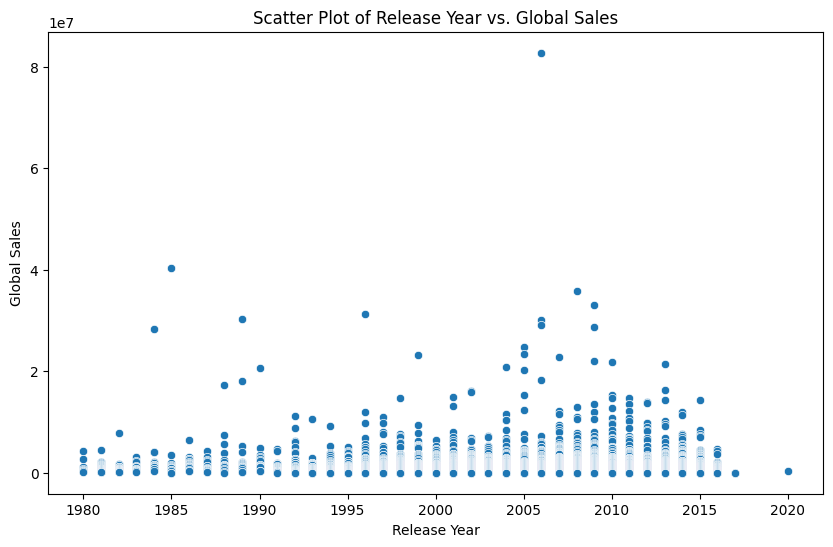

R (Correlation Coefficient): -0.0746
R^2 (Coefficient of Determination): 0.0056


In [154]:
# Scatter plot of Release Year vs. Global Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Global_Sales')
plt.title('Scatter Plot of Release Year vs. Global Sales')
plt.xlabel('Release Year')
plt.ylabel('Global Sales')
plt.show()
from scipy.stats import linregress

# Calculate correlation and R^2
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Global_Sales'])

# Print results
print(f"R (Correlation Coefficient): {r_value:.4f}")
print(f"R^2 (Coefficient of Determination): {r_value**2:.4f}")

<strong>Video game release year vs the global sales (scale: 10s of millions)</strong>

At first glance, it might appear that the trend for video game sales is upward, indicating a positive relationship betwen year of release and total sales. We can see extreme datapoints such as Super Marios Bros for NES (released 1985) and Wii Sports (released 2006).

However, the calculated R-value derived here indicates almost no linear relationship between time (year) and video game sales. As time has passed, total video game sales seem to have not increased, despite the increase of video games as a form of entertainment and the wider accessibility of home consoles beginning in the 1990s and 2000s.

This can be explained by a few things. Total video game sales is also affected by time since release. A newer game, in the majority of cases, will have less sales than an older released game. The R^2 value here indicates that only 0.5% of the variability of global sales can be determined by the release year (or time since 1980).



<ipython-input-155-b56f78274753>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_by_genre_df, x='Genre', y='Global_Sales', palette="viridis", capsize=0.1)
<ipython-input-155-b56f78274753>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales_by_genre_df, x='Genre', y='Global_Sales', palette="viridis", capsize=0.1)


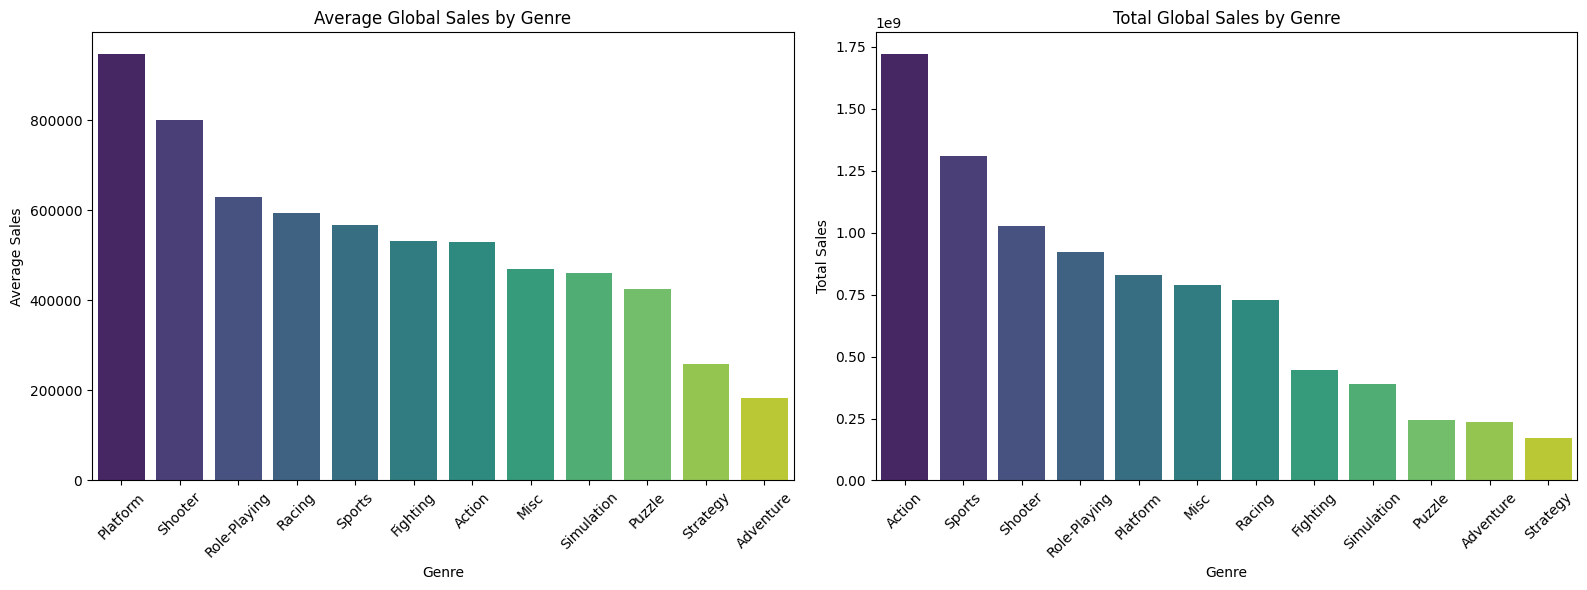

In [155]:
# Correct the data preparation for bar plots
avg_sales_by_genre = df.groupby('Genre')['Global_Sales'].mean()
total_sales_by_genre = df.groupby('Genre')['Global_Sales'].sum()
avg_sales_by_genre_df = avg_sales_by_genre.reset_index().sort_values(by='Global_Sales', ascending=False)
total_sales_by_genre_df = total_sales_by_genre.reset_index().sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(16, 6))

# AVG sales with error bars
plt.subplot(1, 2, 1)
sns.barplot(data=avg_sales_by_genre_df, x='Genre', y='Global_Sales', palette="viridis", capsize=0.1)
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# TOTAL sales
plt.subplot(1, 2, 2)
sns.barplot(data=total_sales_by_genre_df, x='Genre', y='Global_Sales', palette="viridis", capsize=0.1)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<strong>By plotting Genre vs Avg Sales and Genre vs Total Sales, we can gather some interesing insights. </strong>

First of all, platformer games (such as Super Mario games) seem to have the best average sales among all genres, followed by the shooter genre (Call of Duty, Battlefield, and Halo series).

With total sales, without a doubt, action games have the most, with about 1.75 billion total copies sold. Franchises include Grand Theft Auto and The Legend of Zelda.

As shown here, platform genre games have the best expected sales of all games, with nearly a million sales for the average platform game. However, it seems that action games have the advantage in terms of total global sales, which can be explained by the sheer quantity of action games released.

This difference between Genre when comparing Avg and Total Sales may indicate that Genre does not play as big of a role on Global Sales as I originally thought.

In [156]:
avg_sales_by_region = {
    "NA_Sales": df["NA_Sales"].mean()*1000000,
    "EU_Sales": df["EU_Sales"].mean()*1000000,
    "JP_Sales": df["JP_Sales"].mean()*1000000,
    "Other_Sales": df["Other_Sales"].mean()*1000000,
    "Global_Sales": df["Global_Sales"].mean()
}
total_sales_by_region = {
    "NA_Sales": df["NA_Sales"].sum()*1000000,
    "EU_Sales": df["EU_Sales"].sum()*1000000,
    "JP_Sales": df["JP_Sales"].sum()*1000000,
    "Other_Sales": df["Other_Sales"].sum()*1000000,
    "Global_Sales": df["Global_Sales"].sum()
}


avg_sales_by_region_df = pd.DataFrame(list(avg_sales_by_region.items()), columns=["Region", "Average Sales"])
total_sales_by_region_df = pd.DataFrame(list(total_sales_by_region.items()), columns=["Region", "Total Sales"])

# Display the result
print(avg_sales_by_region_df)
print()
print(total_sales_by_region_df)

         Region  Average Sales
0      NA_Sales  265646.676079
1      EU_Sales  147731.262660
2      JP_Sales   78833.098030
3   Other_Sales   48426.124854
4  Global_Sales  540910.318581

         Region   Total Sales
0      NA_Sales  4.327650e+09
1      EU_Sales  2.406690e+09
2      JP_Sales  1.284270e+09
3   Other_Sales  7.889100e+08
4  Global_Sales  8.811970e+09


As expected, the ranking for both avg sales and total sales per region follows the same ranking: North America holds the highest avg/total sales, followed by EU, Japan, and other regions.

<ipython-input-157-c424d922aebe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_publisher.values, y=total_sales_by_publisher.index, palette="gray")


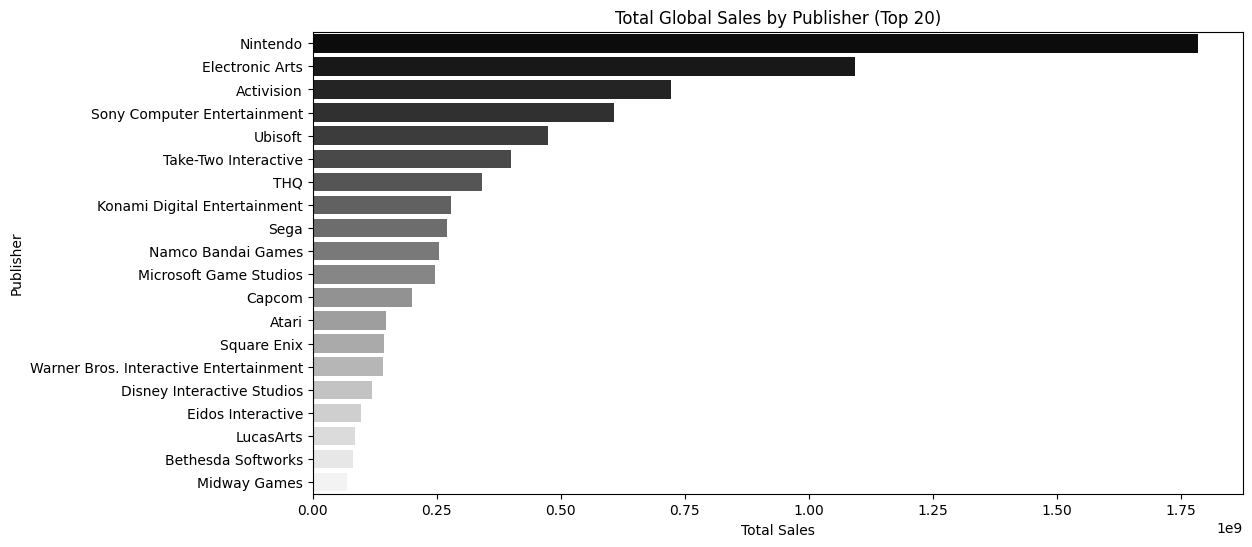

In [157]:
# Calculate TOTAL sales by PUBLISHER
total_sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_publisher.values, y=total_sales_by_publisher.index, palette="gray")
plt.title('Total Global Sales by Publisher (Top 20)')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.show()


In [158]:
# CALC TOTAL SALES OF WHOLE DATASET
total_sales = df['Global_Sales'].sum()

# Calculate TOTAL SALES BY PUBLISHER, sort desc
total_sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# CALC the TOTAL sales of the TOP 10
top_10_publishers_sales = total_sales_by_publisher.head(10).sum()

# CALC the PROPORTION of TOTAL sales by the TOP 10
proportion_top_10 = top_10_publishers_sales / total_sales

print("Total Sales of dataset: ", total_sales)
print("Total Sales of Top 10 Publishers: ", top_10_publishers_sales)
print("Proportion of Total Sales of Top 10 Publishers: ", proportion_top_10)


Total Sales of dataset:  8811970000.0
Total Sales of Top 10 Publishers:  6222700000.0
Proportion of Total Sales of Top 10 Publishers:  0.7061644558481248


As you can see, the Top 10 Video game publishers make up 70% of the video game sales in the dataset I have of games w/ sales over 100k. This means that the publisher is a very important categorical feature that must be accounted for in the model.

<ipython-input-159-1c77d49476a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_publisher.values, y=total_sales_by_publisher.index, palette="gray")


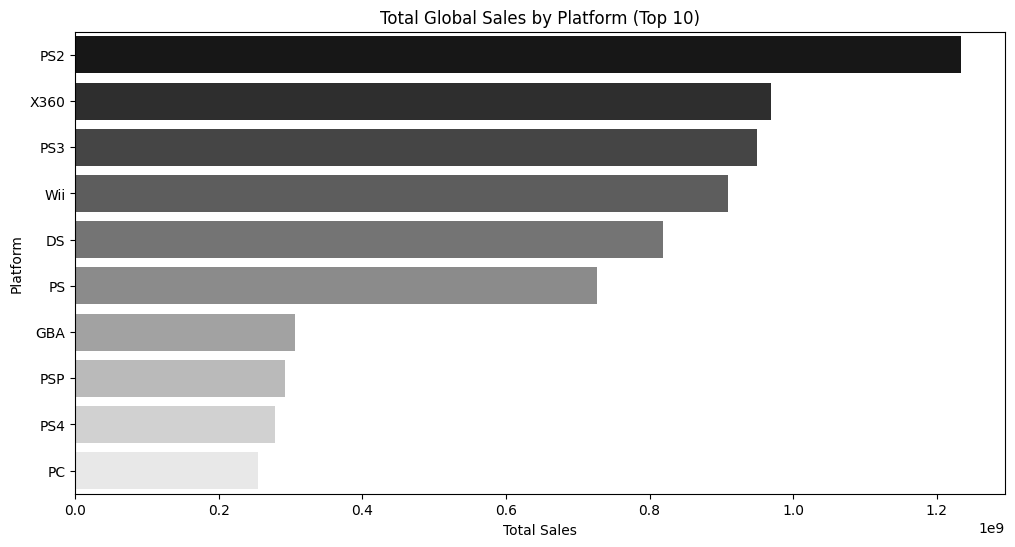

In [159]:
# Calculate TOTAL sales by PLATFORM
total_sales_by_publisher = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_publisher.values, y=total_sales_by_publisher.index, palette="gray")
plt.title('Total Global Sales by Platform (Top 10)')
plt.xlabel('Total Sales')
plt.ylabel('Platform')
plt.show()

In [160]:
# Calculate TOTAL SALES BY PLATFORM, sort desc
total_sales_by_platform= df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# CALC the TOTAL sales of the TOP 10
top_10_platform_sales = total_sales_by_platform.head(10).sum()

# CALC the PROPORTION of TOTAL sales by the TOP 10
proportion_top_10 = top_10_platform_sales / total_sales

print("Total Sales of dataset: ", total_sales)
print("Total Sales of Top 10 Platforms: ", top_10_platform_sales)
print("Proportion of Total Sales of Top 10 Platforms: ", proportion_top_10)


Total Sales of dataset:  8811970000.0
Total Sales of Top 10 Platforms:  6738650000.0
Proportion of Total Sales of Top 10 Platforms:  0.764715494946079


The top 10 platforms make up over 76% of the total sales in this dataset. Platform is yet another important categorical feature that should be considered in the predictive model.

## <strong>Modeling & Interpretations</strong>



To predict global video game sales, I'm employing several regression models to evaluate their performance in forecasting global sales and capturing the variations in my dataset. These models aim to account for the inherent fluctuations in sales across different games, platforms, genres, and publishers. For each of these models, I utilized an 80-20 train-test split, training the model on 80% of the dataset and testing its predictive capabilities on the remaining 20%. This approach ensures that the models are trained on a majority of the data while retaining a separate portion for unbiased evaluation. Note that my random state I tested on is n=2004 so if there are performance results that differ only marginally that may affect the ranking of the model.

In [161]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

#### Baseline Model

I evaluated the success of each of my models by comparing their performance metrics, such as root mean squared error (RMSE), to a baseline model's RMSE. To establish the baseline value, I used the mean global sales from my dataset as a simple prediction for all games. This served as a reference point to assess how effectively the models improved upon a naive prediction approach. The reason I chose RMSE is for a more robust evaluation.


In [162]:
y = df['Global_Sales']
baseline_preds = np.ones(len(y)) * y.mean()
baseline_rmse = root_mean_squared_error(y, baseline_preds)


print(f"Baseline RMSE: {baseline_rmse}")

print()

Baseline RMSE: 1567296.4014322993



<strong>Interpretation of the baseline model (original dataset): </strong>

On average, the predictions made by the baseline model (which simply predicts the mean global sales for all games) deviate from the actual global sales by approximately 1,567,296 sales.

We have an issue here: The RMSE of 1.5 million is disproportionately large compared to the majority of the games in my dataset, most of which don't even reach 1 million in sales. Remember, the median is ~170k sales. This discrepancy suggests that the high variability in global sales is skewing the results (non-normal distribution of my dataset).

A log transformation would be beneficial here to adjust scaling and make better sense of this dataset.


In [163]:
df['Log_Global_Sales'] = np.log(df['Global_Sales'])
# USE LOG GLOBAL SALES AS MY TARGET VARIABLE FOR TRAINING & TESTING
y = df['Log_Global_Sales']
baseline_preds = np.ones(len(y)) * y.mean()
baseline_rmse = root_mean_squared_error(y, baseline_preds)

print(f"Baseline log-transformed RMSE: {baseline_rmse}")


Baseline log-transformed RMSE: 1.4626437372520686



<strong>How can I use this to evaluate the effectiveness of my further regression models? </strong>

* If they are significantly lower than the baseline, my models are adding value by capturing meaningful patterns.
* If they are close to the baseline RMSE, my models might not be learning effectively, and further feature engineering or different algorithms might be necessary.

## Multiple Regression Model

Using a multiple regression model, my goal is to use specific categorical and numerical independent variables (Platform, Year of Release, Genre, & Publisher)
to predict the log transformed Global Sales totals. I believe all these variables collectively influence the sales.

In [164]:
#SPLITTING AND TRAINING THE DATA
X = df[['Platform', 'Year', 'Genre', 'Publisher']]
y = df['Log_Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2004)

In [165]:
# Encode categorical
cat_cols = ['Platform', 'Genre', 'Publisher']

In [166]:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),  #One-hot encode categorical variables
    (StandardScaler(), ['Year']),  #Scale numerical variable
    remainder='passthrough'
)

#CREATE PIPELINE
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [167]:
# ALIGN TEST SET CATEGORIES TO MATCH TRAINING SET
for col in cat_cols:
    X_test[col] = X_test[col].astype(
        pd.CategoricalDtype(categories=X_train[col].unique())
    ) #OneHotEncoder won't encounter "unknown categories" during transformation, avoiding the warning
pipe.fit(X_train, y_train)


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Platform', 'Genre',
                                                   'Publisher']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Year'])])),
                ('model', LinearRegression())])

In [168]:
# Find coeffs
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, index=names, columns=["Coefficient"])


,Coefficient
onehotencoder__Platform_3DO,-1.062994
onehotencoder__Platform_3DS,0.084217
onehotencoder__Platform_DC,-0.366052
onehotencoder__Platform_DS,-0.152269
onehotencoder__Platform_GB,0.464021
...,...
onehotencoder__Publisher_imageepoch Inc.,-0.670406
onehotencoder__Publisher_inXile Entertainment,1.986595
"onehotencoder__Publisher_mixi, Inc",3.206729
onehotencoder__Publisher_responDESIGN,0.378545


I have 580 different categorical coefficients here (high dimensionality). This is due to the high cardinality of my categorical independent variables. There are hundreds of video game publishers and tens of platforms and genres, as we've already seen from the EDA (although a select few dominate sales).

In [169]:
#find y-int
lr.intercept_

10.767969515620573

In [170]:
#calculate RMSE for training data
y_train_preds = pipe.predict(X_train)
root_mean_squared_error(y_train, y_train_preds)

1.1207390089164713

In [171]:
#calculate RMSE for testing data
y_test_preds = pipe.predict(X_test)
root_mean_squared_error(y_test, y_test_preds)

1.1718759616540875

In [172]:
from sklearn.inspection import permutation_importance

#PERM FOR FEATURE IMPORTANCE
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Platform,0.164617
Year,0.060162
Genre,0.024577
Publisher,0.503663



My multiple regression model performed better than the baseline RMSE of 1.4626. Both the training data and the testing data outperformed the baseline, with the training RMSE (1.1207) slightly better than the testing RMSE (1.17187). This indicates that the model was able to effectively capture patterns in the data to make predictions, leveraging the information contained within the independent variables. The baseline model simply predicted the mean of the log-transformed global sales, could not account for variability within the data.

The input that was most important in this scenario was the Publisher, which had the highest permutation importance score. These results highlight how certain variables, like publisher and platform, play a critical role in the commercial success of video games, while others like Year or Genre are not as relevant which is what I had predicted before in the EDA.

## KNN (K-Nearest Neighbors) Regression Model

Next up is the KNN Regression model. With encoding my categorical data, I can measure the distance between points and I can also capture the non-linear relationships between features. I want to see if there are any localized relationships or strong clusters.

In [173]:
#SPLITTING AND TRAINING THE DATA
X = df[['Platform', 'Year', 'Genre', 'Publisher']]
y = df['Log_Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2004)

In [174]:
# Encode categorical
cat_cols = ['Platform', 'Genre', 'Publisher']

In [175]:
#SCALE DATA
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),
    remainder=StandardScaler()
)

In [176]:
# CREATE PIPELINE FOR KNN REGRESSION MODEL
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [177]:
# DEFINE grid of hyperparams for num neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}


In [178]:
# GRID-SEARCH w/ Cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Platform',
                                                                          'Genre',
                                                                          'Publisher'])])),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [179]:
grid_search.best_params_

{'model__n_neighbors': 15}

In [180]:
knn = grid_search.best_estimator_ #15-neighbors used in model

In [181]:
#CALC rmse for training data
y_train_preds = knn.predict(X_train)
root_mean_squared_error(y_train, y_train_preds)

1.1142797392108494

In [182]:
#CALC rmse for tetsing data
y_test_preds = knn.predict(X_test)
root_mean_squared_error(y_test, y_test_preds)

1.2201977036056528

In [183]:
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Platform,0.142951
Year,0.099426
Genre,0.071165
Publisher,0.244886


If we look back and compare with the multiple regression RMSE values, the multiple regression model has a marginal edge in predicting the log-transformed global sales on the testing data. KNN's testing RMSE (1.22019) is higher than that of the multiple regression model's testing RMSE (1.17187), indicating that KNN may not fit the training data as tightly as the regression model and that the KNN may be overfitting.


As expected, the most important features here were Publisher and Platform. However, their importance value decreased significantly. Year and Genre have appeared to gain importance value when compared to the Multiple Reg Model.

Further hyperparameter tuning (e.g., varying k, distance metrics) could help improve its performance even more.

## Decision Tree Regression Model

Last but not least, I've decided to go with the Decision Tree model to see if I can improve precision.

I believe Decision Trees are a great next model to try for predicting global sales. Decision Trees are inherently non-linear and capable of modeling complex relationships between the independent variables and the target variable. Multiple Reg is linear, and although KNN has distance metrics, its not as well optimized for high-dimensional categorical data compared to Decision Tree.

Decision Trees excel in leveraging both categorical and numerical features to identify meaningful patterns and splits by having an interpretable decision-making process. Trees are prone to overfitting, so I need to find the optimal max depth thru regularization.


In [202]:
#SPLITTING AND TRAINING THE DATA
X = df[['Platform', 'Year', 'Genre', 'Publisher']]
y = df['Log_Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2004)

In [82]:
!pip install category_encoders

In [203]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# GROUP RARE CATEGORIES
def group_rare_categories(series, threshold=0.001):
    """
    Threshold I decided was 0.1%, if specific cartegory is below 0.1% of the 16,000 games, group it as 'Other'
    """
    counts = series.value_counts(normalize=True)
    rare_categories = counts[counts < threshold].index
    return series.replace(rare_categories, 'Other')

# Make a copy of X
X_train = X_train.copy()
X_test = X_test.copy()

# Apply grouping to high-cardinality categorical features
X_train['Platform'] = group_rare_categories(X_train['Platform'], threshold=0.001)
X_train['Publisher'] = group_rare_categories(X_train['Publisher'], threshold=0.0001)
X_test['Platform'] = group_rare_categories(X_test['Platform'], threshold=0.001)
X_test['Publisher'] = group_rare_categories(X_test['Publisher'], threshold=0.0001)

cat_col = ['Platform', 'Genre', 'Publisher']
num_col = ['Year']

# Use TARGET ENCODING for high-cardinality categorical features
target_encoder = TargetEncoder(cols=['Platform', 'Publisher'])
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), ['Year']),
        ('target_encode', TargetEncoder(cols=['Platform', 'Publisher']), ['Platform', 'Publisher']),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), ['Genre'])
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train, y_train)
X_test_encoded = preprocessor.transform(X_test)


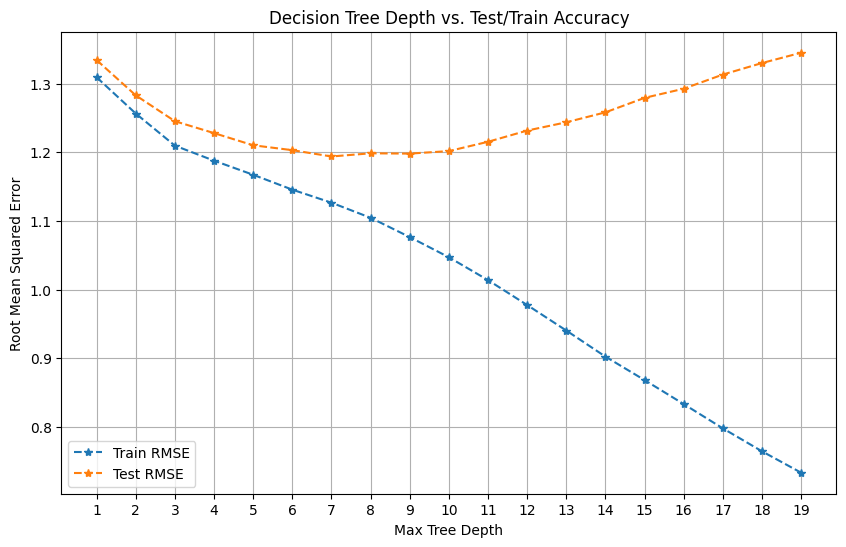

In [204]:

# ROOT MEAN SQUARED ERROR FUNCTION
def root_mean_squared_error(y_true, y_preds):
    return np.sqrt(mean_squared_error(y_true, y_preds))

# FIND OPTIMAL MAX DEPTH
train_scores = []
test_scores = []

for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth=d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(root_mean_squared_error(y_train, y_train_preds))
    test_scores.append(root_mean_squared_error(y_test, y_test_preds))

# PLOT TEST/TRAIN ACCURACIES VS TREE DEPTH
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_scores, '--*', label='Train RMSE')
plt.plot(range(1, 20), test_scores, '--*', label='Test RMSE')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('Max Tree Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');
plt.show()


In [205]:
#fit a decision tree model with a max depth = 8 (lowest rmse test score on graph)
dtree = DecisionTreeRegressor(max_depth = 8).fit(X_train_encoded, y_train)

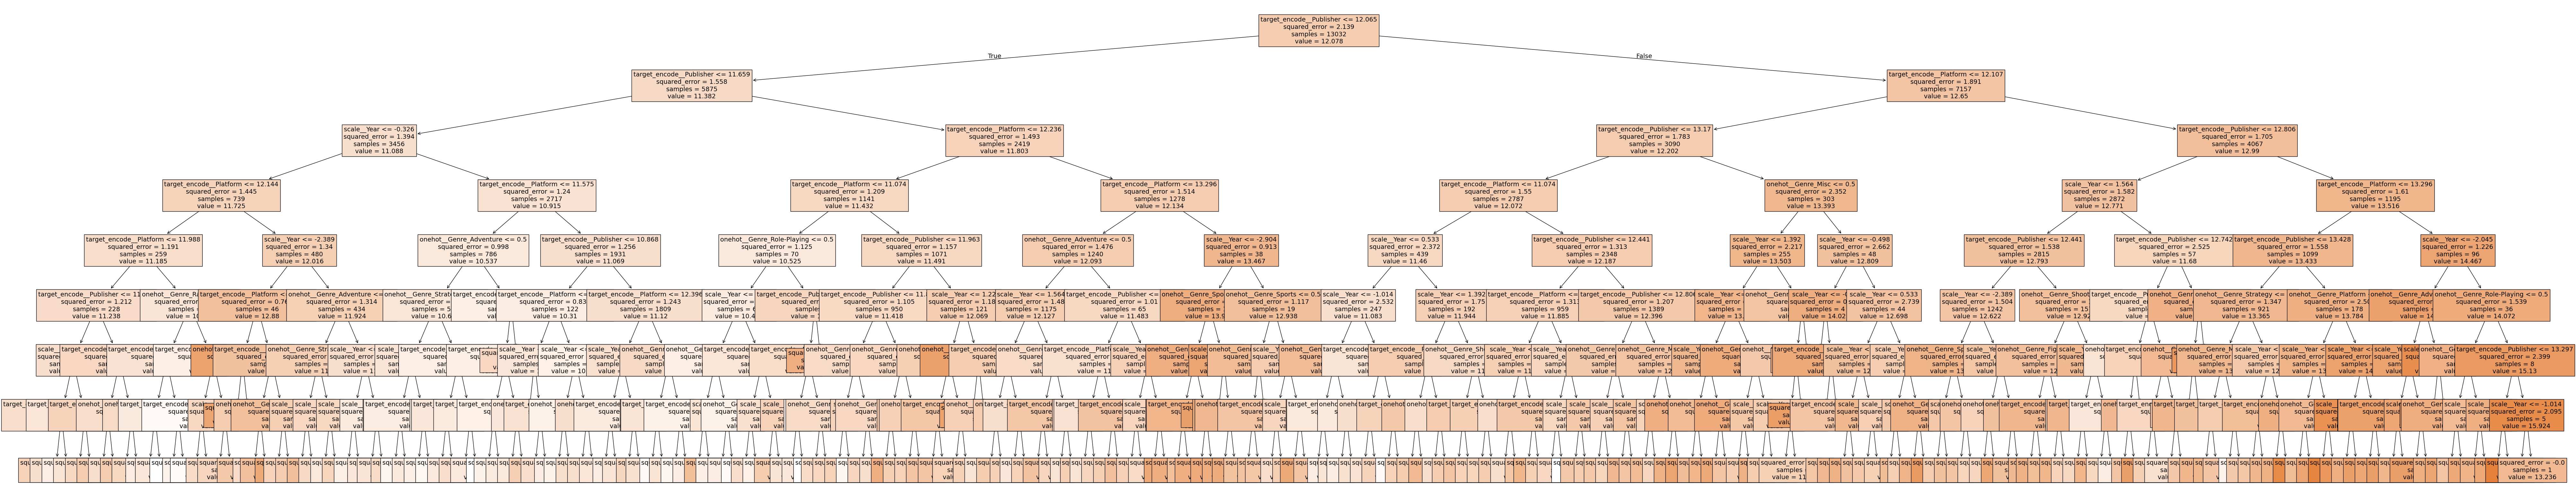

In [197]:
# PLOT THE DECISION TREE
plt.figure(figsize=(100, 20))
plot_tree(dtree, filled=True, feature_names=preprocessor.get_feature_names_out(), fontsize=14);
plt.show()

In [206]:
#calculate rmse for training data
y_train_preds = dtree.predict(X_train_encoded)
root_mean_squared_error(y_train, y_train_preds)

1.1045240084958807

In [207]:
#calculate rmse for testing data
y_test_preds = dtree.predict(X_test_encoded)
root_mean_squared_error(y_test, y_test_preds)

1.198106363528596

In [191]:
# Make sure encoded test data is DENSE
X_test_dense = X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded

# FEATURE IMPORTANCE USING PERMUTATION IMPORTANCE
r = permutation_importance(dtree, X_test_dense, y_test, n_repeats=10, random_state=2004)

# Extract feature names and importances
feature_names = preprocessor.get_feature_names_out()
importances = pd.DataFrame({'Feature': feature_names, 'Importance': r['importances_mean']})

# Sort by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importances)


                       Feature  Importance
2     target_encode__Publisher    0.461425
1      target_encode__Platform    0.240604
0                  scale__Year    0.122632
3      onehot__Genre_Adventure    0.012163
10       onehot__Genre_Shooter    0.010633
5           onehot__Genre_Misc    0.007510
13      onehot__Genre_Strategy    0.005721
12        onehot__Genre_Sports    0.004319
9   onehot__Genre_Role-Playing    0.002928
7         onehot__Genre_Puzzle    0.002646
6       onehot__Genre_Platform    0.001887
4       onehot__Genre_Fighting    0.000518
8         onehot__Genre_Racing    0.000187
11    onehot__Genre_Simulation   -0.004756


The Decision Tree model achieved a training RMSE of 1.104 and a testing RMSE of 1.1969 after applying a threshold of 0.001 to group rare categories. These results indicate that the Decision Tree is slightly better at capturing the patterns in the training data compared to KNN (training RMSE: 1.114) and Multiple Regression (training RMSE: 1.1227). However, the testing RMSE of the Decision Tree is marginally worse than Multiple Regression (testing RMSE: 1.1697) and similar to KNN (testing RMSE: 1.2083). This suggests that while the Decision Tree can effectively model the training data, its generalization to unseen data may still face challenges, possibly due to the complexity of the categorical features. Even after reducing the complexity by grouping rare categories, it still has trouble with unseen(testing data), suggesting overfitting.

As for important features, my target encoded Publisher and Platform features, as expected, provided the most importance. These were followed by year, Genre_Adventure, and Genre_Shooter features. Other categories have reduced to zero importance.



## <strong>Next Steps and Discussion</strong>


#### <strong>Summary and Findings </strong>

After analyzing various regression models and comparing with the baseline (based on mean global sales), I can say that all models provide an improvement in the metric I used: RMSE.

Performance ranking on this dataset:


1.   Multiple Regression
2.   Decision Tree Regression
3.   KNN Regression

When using the trained models on unseen testing data, Multiple Regression proved to provide a reduced error (RMSE) metric compared to the others. I think an simple explanation for this is that the other models suffered from overfitting. With the decision tree, I dropped rare categories under the assumption that they did not have much influence on the predictions. KNN, on the other hand, struggled with high-dimensional data because distance metrics become less meaningful when there are so many features. I think its also important to note that the distrubition of my dataset was highly skewed and non-normal, which could have given these models issues.

Additionally, the log transformation of global sales helped stabilize variance and linearize the relationships in the data, which benefitted the Multiple Regression model greatly, as it is based on linear relationships and the various many coefficients calculated from each of the features. I think if I had not log-transformed my global sales data that the other models would have performed better.

In terms of feature importance, I had correctly assumed that Publisher and Platform were the most important features for predicting global sales, and the models confirmed this to varying degrees. Publisher feature(MR: 0.5, KNN: 0.24, Tree: 0.46). Platform feature (MR: 0.16, KNN: 0.14, Tree: 0.24).





#### <strong>Next Steps and Possible Improvements</strong>

While all models showed improvements on testing data in comparison with the baseline, I think they can be further improved (especially the Decision Tree). Unfortunately, I did not have time to perform emsemble methods like Random Forest or XGBoost, which I believe would have been the most robust models given the fact that they are iterative and handle categorical variables and imbalanced data distributions effectively.

Another possible improvement is changing the train/test split. I found that my dataset was highly skewed(non-normal) and there were many extreme datapoints. The 80/20 train/test split may not have accounted for the highly diverse dataset. A stratified split would have ensured that the distribution of Global_Sales in the training and testing sets matches the original dataset's distribution.

In my dataset, there were regional breakdowns such as NA_Sales, EU_Sales, JP_Sales, and Other_Sales(other regions). If I had include those features in my models, I could have had more granular insights and see how specific regions may affect global sales performance. I had initially believed it was unnecessary to include because it seemed North America and to a lesser extent EU dominated a significant proportion of sales for every game I saw listed.

As for data features that were not found in the dataset, I think game pre-order data or mentions of the specific game title on social media (sort of like a "hype index"), would provide another metric to predict game sales. I would also find a way to add a video game ratings feature by scraping the web to find ratings for each game in my dataset. I strongly believe that audience sentiment is one of the strongest predictor of video game sales.

Incorporating these additional factors into the analysis would allow for further refinement of the models and provide a deeper understanding of the diverse elements that influence video game sales.







